In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from printer_anomaly_detection.model.cae import CAE
from pathlib import Path
import tensorflow as tf
from printer_anomaly_detection.dataset.audio import get_normalization_stats


project_path = Path('../../../../')
dataset_path = project_path / 'datasets' / 'prints'

mean, var, min, max = get_normalization_stats(dataset_path, 'exhaust')

#model = CAE(latent_dim=256, activation='relu', renorm=False, last_activation='tanh')
#model.load_weights(project_path / 'checkpoints' / '2023-06-25T19:42:02-real_exhaust_test-187bd95'/ 'real_exhaust_test-187bd95.250-0.0260.h5')
#model = CAE(latent_dim=256, activation='relu', renorm=False, mean=mean, var=var, last_activation='tanh')
#model.load_weights(project_path / 'checkpoints' / '2023-06-23T16:52:11-exhaust_test-0f73462'/ 'exhaust_test-0f73462.250-0.0672.h5')
#model = CAE(latent_dim=256, activation='relu', renorm=False, mean=mean, var=var)
#model.load_weights(project_path / 'checkpoints' / '2023-06-22T22:07:01-test-31d7553'/ 'test-31d7553.231-0.3521.h5')
#checkpoint = tf.train.Checkpoint(model)
#checkpoint.restore(project_path / 'checkpoints' / '')


2023-06-26 08:14:05.983678: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-26 08:14:05.998848: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-26 08:14:05.999051: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [26]:
from printer_anomaly_detection.dataset.audio import Split, load_audio_dataset_split


dataset_path = project_path / 'datasets' / 'prints'

dataset = load_audio_dataset_split(dataset_path, 'original', Split.TEST, window_size=256, step_size=32, scale=True)

In [27]:
images = dataset.batch(1000).take(1)

In [28]:
images = images.as_numpy_iterator().next()

2023-06-26 08:16:37.832937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
/home/y2g/projects/personal/printer-anomaly-detection/src/printer_anomaly_detection/dataset/audio.py:73: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(path.as_posix())
/home/y2g/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


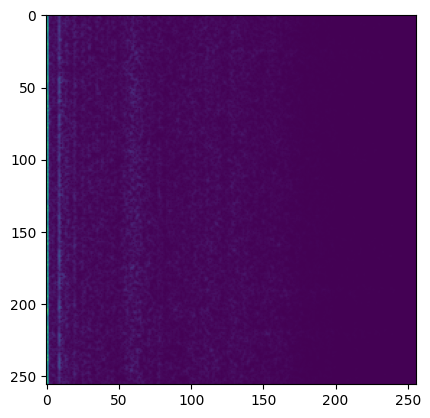

In [31]:
from matplotlib import pyplot as plt


plt.imshow(images[999])

In [32]:
result = model.predict(images)

32/32 [==============================] - 0s 11ms/step


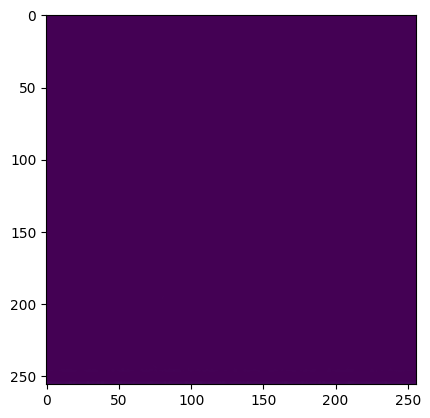

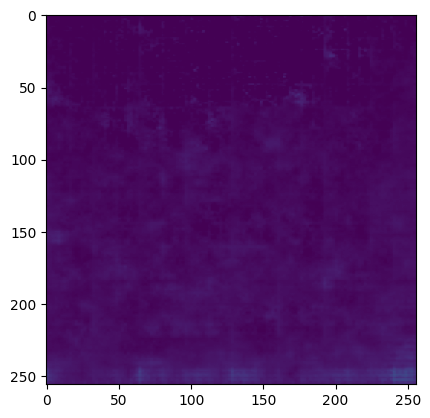

In [33]:
i = 999
from matplotlib.colors import NoNorm
import numpy as np
plt.imshow(np.flip(images[i].T), norm=NoNorm())
plt.show()
plt.imshow(np.flip(result[i][:,:,0].T), norm=NoNorm())

In [9]:
import numpy as np 

np.linalg.norm(result[0] - images[0])

4299.7476

In [10]:
np.max(result[0]), np.max(images[0])

(5.214959, 10.653083)